In [ ]:
import numpy as np

In [1]:
import pandas as pd

# 假设Parquet文件名为'semeval_2010_task_8.parquet'，并且位于当前目录下
file_path = '/content/train-00000-of-00001.parquet'

# 使用pandas的read_parquet函数读取Parquet文件
df = pd.read_parquet(file_path, engine='pyarrow')

# 显示DataFrame的前几行
print(df.head())

                                            sentence  relation
0  The system as described above has its greatest...         3
1  The <e1>child</e1> was carefully wrapped and b...        18
2  The <e1>author</e1> of a keygen uses a <e2>dis...        11
3  A misty <e1>ridge</e1> uprises from the <e2>su...        18
4  The <e1>student</e1> <e2>association</e2> is t...        12


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# 加载数据集
file_path = '/content/train-00000-of-00001.parquet'
df = pd.read_parquet(file_path, engine='pyarrow')

# 数据预处理
X = df['sentence']  # 文本数据
y = df['relation']  # 关系标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 创建管道，使用 CountVectorizer 将文本转换为词频特征，然后使用 SVM 进行分类
model = make_pipeline(CountVectorizer(), SVC(kernel='linear'))

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 打印分类报告
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 打印准确率
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70        75
           1       0.74      0.68      0.71       170
           2       0.38      0.38      0.38       126
           3       0.49      0.33      0.39       120
           4       0.62      0.65      0.64       109
           5       0.80      0.50      0.62        48
           6       0.69      0.80      0.74       194
           8       0.45      0.67      0.54       142
           9       0.73      0.25      0.37        32
          10       0.27      0.12      0.17        25
          11       0.57      0.45      0.50       109
          12       0.75      0.16      0.26        19
          13       0.50      0.56      0.53       157
          14       0.50      0.36      0.42       128
          15       0.45      0.24      0.32        37
          16       0.46      0.41      0.43        81
          17       0.47      0.25      0.33       105
    

In [59]:
dump(model, 'svm_model.joblib')  # 保存模型到文件

['svm_model.joblib']

In [60]:
# initial version, using CountVectorizer for feature extraction (with poor performance)
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from joblib import load

# 加载测试集
test_file_path = '/content/test-00000-of-00001.parquet'  # 替换为你的测试集文件路径
test_df = pd.read_parquet(test_file_path, engine='pyarrow')

# 提取测试集的特征和标签
X_test = test_df['sentence']  # 测试集的文本数据
y_test = test_df['relation']  # 测试集的真实标签

# 加载之前训练好的模型（假设模型已经保存为 joblib 文件）
model_path = 'svm_model.joblib'  # 替换为你的模型文件路径
model = load(model_path)

# 使用训练好的模型对测试集进行预测
y_pred = model.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 使用 'macro' 以适应多分类问题
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# 打印评估指标
print("Model Evaluation on Independent Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 打印详细的分类报告
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation on Independent Test Set:
Accuracy: 0.5006
Precision: 0.5000
Recall: 0.4157
F1 Score: 0.4375

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.66      0.75       134
           1       0.76      0.82      0.79       194
           2       0.40      0.43      0.41       162
           3       0.39      0.30      0.34       150
           4       0.60      0.69      0.64       153
           5       0.72      0.54      0.62        39
           6       0.67      0.78      0.72       291
           7       0.00      0.00      0.00         1
           8       0.56      0.69      0.62       211
           9       0.67      0.17      0.27        47
          10       0.38      0.23      0.29        22
          11       0.48      0.34      0.40       134
          12       0.33      0.09      0.15        32
          13       0.46      0.53      0.49       201
          14       0.55      0.41      0.47    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [42]:
#using IF-IDF for Text Augmentation
# 加载数据集
file_path = '/content/train-00000-of-00001.parquet'
df = pd.read_parquet(file_path, engine='pyarrow')

# 数据预处理
# 假设数据集中有一个名为'text'的列包含文本，一个名为'relation'的列包含关系标签
X = df['sentence']
y = df['relation']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 创建一个管道，首先使用TF-IDF向量化文本，然后使用SVM进行分类
model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))

# 训练模型
model.fit(X_train, y_train)

# 预测测试集
y_pred = model.predict(X_test)

# 打印分类报告
print(classification_report(y_test, y_pred))

# 打印准确率
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.64      0.76        75
           1       0.79      0.64      0.70       170
           2       0.46      0.38      0.42       126
           3       0.73      0.27      0.39       120
           4       0.76      0.68      0.71       109
           5       0.77      0.48      0.59        48
           6       0.73      0.80      0.77       194
           8       0.43      0.63      0.51       142
           9       0.62      0.16      0.25        32
          10       0.60      0.12      0.20        25
          11       0.72      0.36      0.48       109
          12       1.00      0.05      0.10        19
          13       0.55      0.57      0.56       157
          14       0.57      0.30      0.40       128
          15       0.78      0.19      0.30        37
          16       0.53      0.33      0.41        81
          17       0.63      0.11      0.19       105
          18       0.25    

In [43]:
from joblib import dump

# 在训练代码的最后保存模型
dump(model, 'svm_model.joblib')  # 保存模型到文件

['svm_model.joblib']

In [44]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from joblib import load

# 加载测试集
test_file_path = '/content/test-00000-of-00001.parquet'  # 替换为你的测试集文件路径
test_df = pd.read_parquet(test_file_path, engine='pyarrow')

# 提取测试集的特征和标签
X_test = test_df['sentence']  # 测试集的文本数据
y_test = test_df['relation']  # 测试集的真实标签

# 加载之前训练好的模型（假设模型已经保存为 joblib 文件）
model_path = 'svm_model.joblib'  # 替换为你的模型文件路径
model = load(model_path)

# 使用训练好的模型对测试集进行预测
y_pred = model.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 使用 'macro' 以适应多分类问题
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# 打印评估指标
print("Model Evaluation on Independent Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 打印详细的分类报告
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation on Independent Test Set:
Accuracy: 0.5086
Precision: 0.5606
Recall: 0.3882
F1 Score: 0.4196

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79       134
           1       0.85      0.76      0.80       194
           2       0.45      0.45      0.45       162
           3       0.58      0.19      0.29       150
           4       0.69      0.66      0.67       153
           5       0.77      0.62      0.69        39
           6       0.74      0.81      0.77       291
           7       0.00      0.00      0.00         1
           8       0.57      0.73      0.64       211
           9       0.83      0.11      0.19        47
          10       0.33      0.05      0.08        22
          11       0.63      0.28      0.38       134
          12       0.00      0.00      0.00        32
          13       0.51      0.52      0.51       201
          14       0.65      0.38      0.48    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

compared with countvectorizer, using IF-IDF
has better performance in precision

In [2]:
#including grid search: trying different kernal function parameters(C, gamma values); kernel functions
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# 加载数据集
file_path = '/content/train-00000-of-00001.parquet'
df = pd.read_parquet(file_path, engine='pyarrow')

# 数据预处理
X = df['sentence']
y = df['relation']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 创建管道，包括TF-IDF向量化和SVM分类器
pipeline = make_pipeline(TfidfVectorizer(), SVC())

# 定义SVM模型的参数网格
param_grid = {
    'svc__C': [0.1, 1, 10],  # SVM regularization parameter
    'svc__gamma': [0.1, 1, 10],  # Kernel function parameter
    'svc__kernel': ['linear', 'rbf', 'poly']  # Kernel function type
}

# 创建网格搜索对象
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=4, scoring='f1_macro')

# 拟合网格搜索对象到训练数据
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳分数
print(f'The best parameter is {grid_search.best_params_}')
print(f'The best score is {grid_search.best_score_}')
print(f'The best estimator is {grid_search.best_estimator_}')

# 使用最佳模型进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 评估模型性能
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


The best parameter is {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}
The best score is 0.4689400884233175
The best estimator is Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc', SVC(C=10, gamma=0.1, kernel='linear'))])
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.65      0.74        75
           1       0.76      0.67      0.71       170
           2       0.42      0.44      0.43       126
           3       0.54      0.36      0.43       120
           4       0.75      0.68      0.71       109
           5       0.77      0.56      0.65        48
           6       0.74      0.79      0.77       194
           8       0.48      0.68      0.56       142
           9       0.65      0.34      0.45        32
          10       0.46      0.24      0.32        25
          11       0.61      0.45      0.52       109
          12       0.57      0.21      0.31        19
          13 

In [15]:
dump(best_model, 'svm_model.joblib')  # 保存模型到文件

['svm_model.joblib']

In [16]:
# 加载独立测试集
test_file_path = '/content/test-00000-of-00001.parquet'  # 替换为你的测试集文件路径
test_df = pd.read_parquet(test_file_path, engine='pyarrow')

# 提取测试集的特征和标签
X_test = test_df['sentence']  # 测试集的文本数据
y_test = test_df['relation']  # 测试集的真实标签

# 加载之前保存的最佳模型
model_path = 'svm_model.joblib'  # 替换为你的模型文件路径
best_model = load(model_path)

# 使用最佳模型对测试集进行预测
y_pred = best_model.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 使用 'macro' 以适应多分类问题
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# 打印评估指标
print("Model Evaluation on Independent Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 打印详细的分类报告
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation on Independent Test Set:
Accuracy: 0.5274
Precision: 0.5592
Recall: 0.4508
F1 Score: 0.4802

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80       134
           1       0.80      0.80      0.80       194
           2       0.42      0.48      0.44       162
           3       0.42      0.30      0.35       150
           4       0.67      0.65      0.66       153
           5       0.72      0.67      0.69        39
           6       0.72      0.81      0.76       291
           7       0.00      0.00      0.00         1
           8       0.59      0.70      0.64       211
           9       0.86      0.26      0.39        47
          10       0.53      0.36      0.43        22
          11       0.54      0.37      0.44       134
          12       0.50      0.09      0.16        32
          13       0.53      0.55      0.54       201
          14       0.60      0.46      0.52    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Compared with the initial SVM method,
there are improvments in those scores
from test sets by adding grid search to
search best parameters.

In [50]:
#adding preprocessing
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# 下载 NLTK 数据包
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 加载数据集
file_path = '/content/train-00000-of-00001.parquet'
df = pd.read_parquet(file_path, engine='pyarrow')

# 数据预处理
def preprocess_text(text):
    # 1. 去除标点符号和数字
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # 2. 分词
    tokens = word_tokenize(text.lower())

    # 3. 去除停用词
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 4. 词形还原
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 5. 重新组合成句子
    return ' '.join(tokens)

# 应用预处理
df['sentence'] = df['sentence'].apply(preprocess_text)

# 提取特征和标签
X = df['sentence']
y = df['relation']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 创建管道，包括 TF-IDF 向量化和 SVM 分类器
pipeline = make_pipeline(TfidfVectorizer(), SVC())

# 定义 SVM 模型的参数网格
param_grid = {
    'svc__C': [0.1, 1, 10],  # SVM regularization parameter
    'svc__gamma': [0.1, 1, 10],  # Kernel function parameter
    'svc__kernel': ['linear', 'rbf', 'poly']  # Kernel function type
}

# 创建网格搜索对象
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=4, scoring='f1_macro')

# 拟合网格搜索对象到训练数据
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳分数
print(f'The best parameter is {grid_search.best_params_}')
print(f'The best score is {grid_search.best_score_}')
print(f'The best estimator is {grid_search.best_estimator_}')

# 使用最佳模型进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 评估模型性能
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


The best parameter is {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'linear'}
The best score is 0.39827643994486805
The best estimator is Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('svc', SVC(C=10, gamma=0.1, kernel='linear'))])
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.53      0.62        75
           1       0.74      0.65      0.69       170
           2       0.39      0.25      0.31       126
           3       0.39      0.30      0.34       120
           4       0.71      0.51      0.60       109
           5       0.60      0.44      0.51        48
           6       0.71      0.71      0.71       194
           8       0.51      0.46      0.49       142
           9       0.88      0.44      0.58        32
          10       0.40      0.08      0.13        25
          11       0.52      0.38      0.44       109
          12       0.80      0.42      0.55        19
          13

In [51]:
dump(best_model, 'svm_model.joblib')  # 保存模型到文件

['svm_model.joblib']

In [52]:
# 加载测试集
test_file_path = '/content/test-00000-of-00001.parquet'  # 替换为你的测试集文件路径
test_df = pd.read_parquet(test_file_path, engine='pyarrow')

# 应用预处理
test_df['sentence'] = test_df['sentence'].apply(preprocess_text)

# 提取测试集的特征和标签
X_test = test_df['sentence']
y_test = test_df['relation']

# 加载训练好的模型
model_path = 'svm_model.joblib'  # 替换为你的模型文件路径
best_model = load(model_path)

# 使用最佳模型对测试集进行预测
y_pred = best_model.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# 打印评估指标
print("Model Evaluation on Independent Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 打印详细的分类报告
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation on Independent Test Set:
Accuracy: 0.4674
Precision: 0.4870
Recall: 0.3749
F1 Score: 0.4101

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.56      0.66       134
           1       0.68      0.70      0.69       194
           2       0.46      0.33      0.38       162
           3       0.37      0.29      0.33       150
           4       0.71      0.54      0.61       153
           5       0.47      0.46      0.47        39
           6       0.71      0.75      0.73       291
           7       0.00      0.00      0.00         1
           8       0.59      0.47      0.52       211
           9       0.77      0.36      0.49        47
          10       0.33      0.23      0.27        22
          11       0.51      0.32      0.39       134
          12       0.56      0.16      0.24        32
          13       0.52      0.45      0.48       201
          14       0.50      0.40      0.44    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

After adding preprocessing step including nltk.word_tokenize,nltk.corpus.stopwords,nltk.stem.WordNetLemmatizer, the performance of SVM decreases from the result of test set.

In [47]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# 数据预处理函数
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 去除标点符号
    text = re.sub(r'\d+', '', text)  # 去除数字
    tokens = word_tokenize(text.lower())  # 分词
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # 去除停用词
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # 词形还原
    return ' '.join(tokens)

# 加载数据集
file_path = '/content/train-00000-of-00001.parquet'
df = pd.read_parquet(file_path, engine='pyarrow')

# 应用预处理
df['sentence'] = df['sentence'].apply(preprocess_text)

# 划分训练集和测试集
X = df['sentence']
y = df['relation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 创建管道
pipeline = make_pipeline(TfidfVectorizer(), SVC())

# 定义参数网格
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__degree': [2, 3, 4]
}

# 网格搜索
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=4, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# 输出最佳参数和分数
print(f'The best parameter is {grid_search.best_params_}')
print(f'The best score is {grid_search.best_score_}')

# 使用最佳模型进行预测
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 评估模型性能
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


The best parameter is {'svc__C': 100, 'svc__degree': 2, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
The best score is 0.3992307851026249
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.53      0.63        75
           1       0.73      0.65      0.69       170
           2       0.40      0.26      0.32       126
           3       0.40      0.30      0.34       120
           4       0.73      0.51      0.60       109
           5       0.58      0.44      0.50        48
           6       0.70      0.72      0.71       194
           8       0.51      0.44      0.47       142
           9       0.88      0.44      0.58        32
          10       0.40      0.08      0.13        25
          11       0.56      0.39      0.46       109
          12       0.80      0.42      0.55        19
          13       0.56      0.43      0.49       157
          14       0.43      0.39      0.41       128
          15       0.64      0.

In [48]:
dump(best_model, 'svm_model.joblib')  # 保存模型到文件

['svm_model.joblib']

In [49]:
# 加载测试集
test_file_path = '/content/test-00000-of-00001.parquet'  # 替换为你的测试集文件路径
test_df = pd.read_parquet(test_file_path, engine='pyarrow')

# 应用预处理
test_df['sentence'] = test_df['sentence'].apply(preprocess_text)

# 提取测试集的特征和标签
X_test = test_df['sentence']
y_test = test_df['relation']

# 加载训练好的模型
model_path = 'svm_model.joblib'  # 替换为你的模型文件路径
best_model = load(model_path)

# 使用最佳模型对测试集进行预测
y_pred = best_model.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# 打印评估指标
print("Model Evaluation on Independent Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 打印详细的分类报告
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation on Independent Test Set:
Accuracy: 0.4696
Precision: 0.4925
Recall: 0.3730
F1 Score: 0.4098

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.56      0.65       134
           1       0.68      0.70      0.69       194
           2       0.48      0.34      0.40       162
           3       0.38      0.29      0.33       150
           4       0.72      0.54      0.61       153
           5       0.47      0.46      0.47        39
           6       0.72      0.76      0.74       291
           7       0.00      0.00      0.00         1
           8       0.60      0.47      0.53       211
           9       0.81      0.36      0.50        47
          10       0.31      0.18      0.23        22
          11       0.52      0.32      0.40       134
          12       0.56      0.16      0.24        32
          13       0.53      0.46      0.49       201
          14       0.50      0.40      0.45    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [56]:
#using BiLSTM+Attention to extract features from texts
#input extracted features to SVM for relation extraction

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from joblib import load
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Attention
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Attention, GlobalAveragePooling1D # Import GlobalAveragePooling1D
# 加载数据集
train_file_path = '/content/train-00000-of-00001.parquet'
test_file_path = '/content/test-00000-of-00001.parquet'
train_df = pd.read_parquet(train_file_path, engine='pyarrow')
test_df = pd.read_parquet(test_file_path, engine='pyarrow')

# 数据预处理
X_train = train_df['sentence']
y_train = train_df['relation']
X_test = test_df['sentence']
y_test = test_df['relation']

# 使用 Tokenizer 将文本转换为序列
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# 填充序列
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# 定义 BiLSTM + Attention 模型
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=10000, output_dim=100)(input_layer)
bilstm_layer = Bidirectional(LSTM(units=64, return_sequences=True))(embedding_layer)
attention_layer = tf.keras.layers.Attention()([bilstm_layer, bilstm_layer])
# Add GlobalAveragePooling1D layer to get a fixed-length vector
pooling_layer = GlobalAveragePooling1D()(attention_layer)
output_layer = Dense(units=len(y_train.unique()), activation='softmax')(pooling_layer) # Connect to pooling layer

# 构建模型
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 训练深度学习模型
model.fit(X_train_pad, y_train, epochs=10, validation_split=0.2)

# 使用深度学习模型提取特征
train_features = model.predict(X_train_pad)
test_features = model.predict(X_test_pad)

# 使用 SVM 进行分类
svm_model = make_pipeline(SVC(kernel='linear')) # Remove TfidfVectorizer
svm_model.fit(train_features, y_train)

# 预测和评估
y_pred = svm_model.predict(test_features)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Model Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.1517 - loss: 2.7269 - val_accuracy: 0.2331 - val_loss: 2.6926
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.2199 - loss: 2.5157 - val_accuracy: 0.2781 - val_loss: 2.4770
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3165 - loss: 2.1688 - val_accuracy: 0.2788 - val_loss: 2.4108
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4856 - loss: 1.6610 - val_accuracy: 0.2781 - val_loss: 2.4207
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6504 - loss: 1.2023 - val_accuracy: 0.3225 - val_loss: 2.4280
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7585 - loss: 0.8652 - val_accuracy: 0.3600 - val_loss: 2.5176
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8447 - loss: 0.5930 - val_accuracy: 0.3438 - val_loss: 2.7178
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9005 - loss: 0.3999 - val_accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

The tests prediction results are not as good
as the first grid search improvement method.

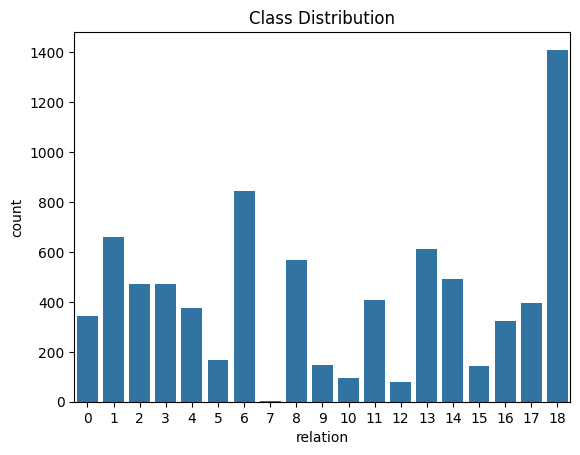

In [61]:
#checking distributions in the samples
import seaborn as sns
import matplotlib.pyplot as plt

# 检查类别分布
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

# 加载数据集
file_path = '/content/train-00000-of-00001.parquet'
df = pd.read_parquet(file_path, engine='pyarrow')

# 数据预处理
X = df['sentence']
y = df['relation']

# 检查类别分布
print("Original class distribution:", Counter(y))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 使用 TF-IDF 将文本转换为数值特征
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

# 定义欠采样策略，确保每个类别的目标样本数不超过原始样本数
sampling_strategy_undersample = {
    label: min(count, max(2, count // 2))  # 确保目标样本数不超过原始样本数
    for label, count in Counter(y_train).items()
}

# 使用 RandomUnderSampler 进行欠采样
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy_undersample, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train_vec, y_train)

# 检查重新采样后的类别分布
print("Resampled class distribution after undersampling:", Counter(y_resampled))

# 动态调整 SMOTE 的 k_neighbors 参数
min_samples = min(Counter(y_resampled).values())
k_neighbors = min(max(1, min_samples - 1), 5)  # 确保 k_neighbors 适应样本数量

# 定义过采样策略，确保每个类别至少有2个样本
sampling_strategy_smote = {
    label: max(2, count)  # 确保每个类别至少有2个样本
    for label, count in Counter(y_resampled).items()
}

# 使用 SMOTE 进行过采样
smote = SMOTE(random_state=42, k_neighbors=k_neighbors, sampling_strategy=sampling_strategy_smote)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# 检查重新采样后的类别分布
print("Resampled class distribution after oversampling:", Counter(y_resampled))

# 创建管道，包括 TF-IDF 向量化和 SVM 分类器
pipeline = make_pipeline(TfidfVectorizer(), SVC())

# 定义 SVM 模型的参数网格
param_grid = {
    'svc__C': [0.1, 1, 10],  # SVM regularization parameter
    'svc__gamma': [0.1, 1, 10],  # Kernel function parameter
    'svc__kernel': ['linear', 'rbf', 'poly']  # Kernel function type
}

# 创建网格搜索对象
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=4, scoring='f1_macro')

# 拟合网格搜索对象到重新采样后的训练数据
grid_search.fit(X_resampled, y_resampled)

# 输出最佳参数和最佳分数
print(f'The best parameter is {grid_search.best_params_}')
print(f'The best score is {grid_search.best_score_}')
print(f'The best estimator is {grid_search.best_estimator_}')

# 使用最佳模型进行预测
best_model = grid_search.best_estimator_
# 在预测之前，需要将测试集数据也转换为数值特征
X_test_vec = vectorizer.transform(X_test)
y_pred = best_model.predict(X_test_vec)

# 评估模型性能
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Original class distribution: Counter({18: 1410, 6: 844, 1: 659, 13: 612, 8: 568, 14: 490, 3: 471, 2: 470, 11: 407, 17: 394, 4: 374, 0: 344, 16: 323, 5: 166, 9: 148, 15: 144, 10: 97, 12: 78, 7: 1})
Resampled class distribution after undersampling: Counter({18: 543, 6: 325, 1: 244, 13: 227, 8: 213, 14: 181, 3: 175, 2: 172, 11: 149, 17: 144, 0: 134, 4: 132, 16: 121, 5: 59, 9: 58, 15: 53, 10: 36, 12: 29, 7: 1})


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 2, n_samples_fit = 1, n_samples = 1